### Lab 2: Exploring Activation Functions in Neural Networks

##### 1. Implement and Visualize Activation Functions:

#### Implement the following activation functions in Python:
*   Step Function

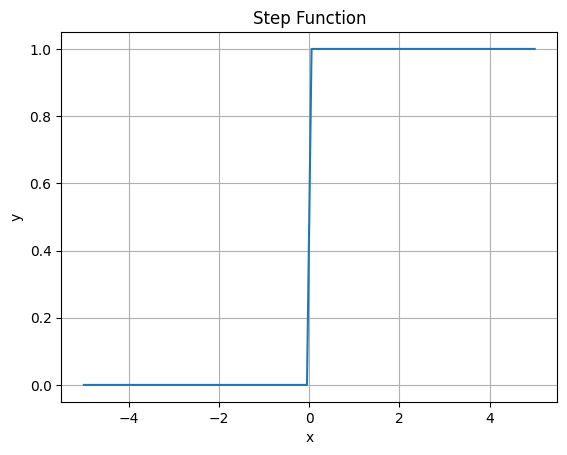

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
  return 1 if x >= 0 else 0

# Example usage:
x_values = np.linspace(-5, 5, 100)
y_values = [step_function(x) for x in x_values]

plt.plot(x_values, y_values)
plt.title("Step Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
# Interpretation of the Step Function Output

# The step function is a threshold-based activation function.
# It outputs 1 when the input is greater than or equal to 0, and 0 otherwise.
# This creates a sharp transition between two states (0 and 1), making it useful for binary classification.

# In the graph, we can see:
# - The output is 0 for all x values less than 0.
# - The output abruptly jumps to 1 when x is greater than or equal to 0.

*   Sigmoid Function (Binary and Bipolar)

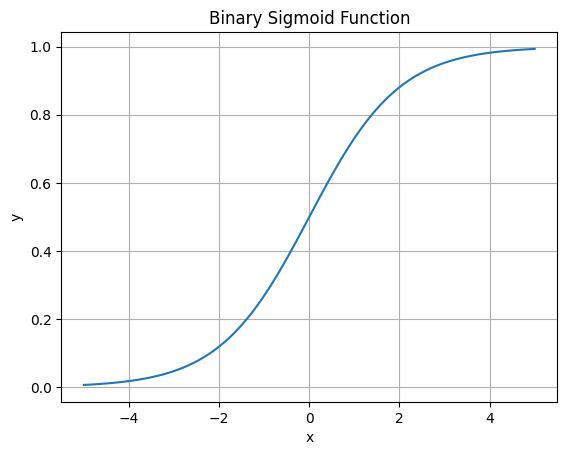

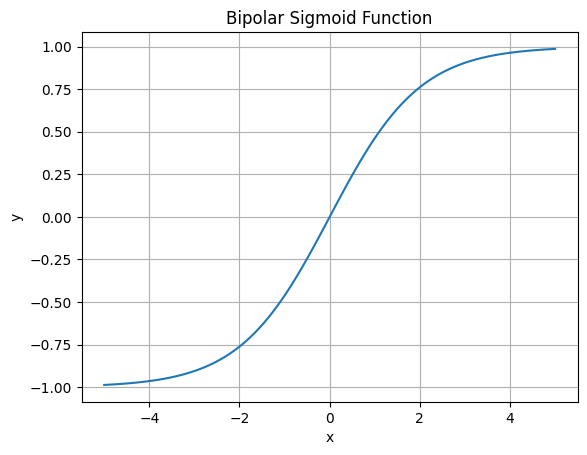

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid_binary(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
  return (1 - np.exp(-x)) / (1 + np.exp(-x))

# binary sigmoid:
y_values_binary = [sigmoid_binary(x) for x in x_values]
plt.plot(x_values, y_values_binary)
plt.title("Binary Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# bipolar sigmoid:
y_values_bipolar = [sigmoid_bipolar(x) for x in x_values]
plt.plot(x_values, y_values_bipolar)
plt.title("Bipolar Sigmoid Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [ ]:
# Interpretation of the Sigmoid Function Output

# The sigmoid function is a smooth, S-shaped curve that maps any input to a value between 0 and 1.
# It's often used for binary classification problems, where the output represents the probability of belonging to a specific class.

# In the graphs of the Binary and Bipolar Sigmoid functions, we see:

# Binary Sigmoid:
# - The output smoothly increases from 0 to 1 as the input increases.
# - The curve is asymptotic, approaching 0 as x goes to negative infinity and 1 as x goes to positive infinity.

# Bipolar Sigmoid:
# - The output smoothly increases from -1 to 1 as the input increases.
# - The curve is asymptotic, approaching -1 as x goes to negative infinity and 1 as x goes to positive infinity.
# - It can be used to represent a classification between two classes.

* Tanh Function

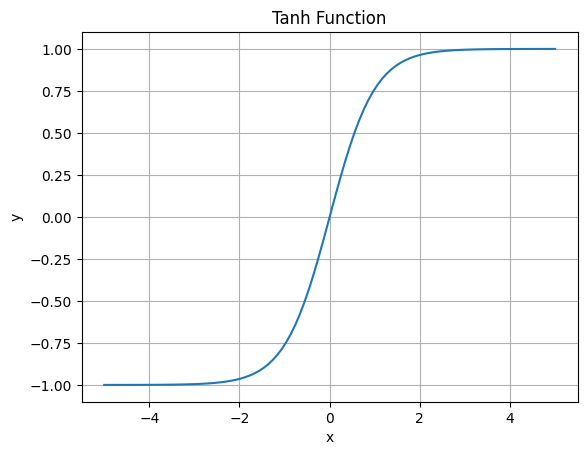

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def tanh_function(x):
  return np.tanh(x)

# tanh:
y_values_tanh = [tanh_function(x) for x in x_values]
plt.plot(x_values, y_values_tanh)
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
# Interpretation of the Tanh Function Output

# The tanh function (hyperbolic tangent) is similar to the sigmoid function but outputs values between -1 and 1.
# It's also an S-shaped curve, but centered around 0.

# In the graph of the tanh function, we can see:
# - The output smoothly increases from -1 to 1 as the input increases.
# - The curve is asymptotic, approaching -1 as x goes to negative infinity and 1 as x goes to positive infinity.
# - The function is symmetric around the origin (0,0).

# Comparison with Sigmoid and Step Functions:

# - The step function is a very basic and discontinuous function, offering only a binary output.
# - The sigmoid function provides a continuous output between 0 and 1, which is useful for representing probabilities.
# - The tanh function is a continuous output between -1 and 1, providing a zero-centered output that is considered
# beneficial in some scenarios for training deep neural networks.

* ReLU Function

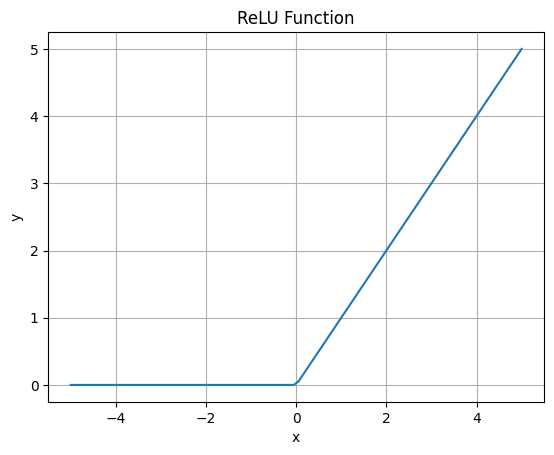

In [ ]:
import matplotlib.pyplot as plt
def relu_function(x):
  return max(0, x)

# relu:
y_values_relu = [relu_function(x) for x in x_values]
plt.plot(x_values, y_values_relu)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
# Interpretation of the ReLU Function Output

# The ReLU (Rectified Linear Unit) function is a piecewise linear function that outputs the input directly
# if it's positive, and 0 otherwise.

# In the graph of the ReLU function, we can see:
# - The output is 0 for all x values less than 0.
# - The output is equal to x for all x values greater than or equal to 0.
# - This creates a linear relationship between the input and output for positive values.
# - ReLU is popular because it is computationally efficient and can help prevent the vanishing gradient problem
# in deep neural networks, which can occur with activation functions like the sigmoid and tanh.

#### 2. Implement a Simple Neural Network:

* Create a simple neural network with one hidden layer using each activation function (sigmoid, tanh, and ReLU).
* Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.
* Compare the performance of the neural network with different activation
functions.

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Softmax function for multinomial classification (output layer)
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Forward propagation function
def forward(X, weights1, bias1, weights2, bias2, activation_function):
    # Hidden layer
    z1 = np.dot(X, weights1) + bias1
    a1 = activation_function(z1)

    # Output layer with softmax for multinomial classification
    z2 = np.dot(a1, weights2) + bias2
    a2 = softmax(z2)
    return a2

# Load the Iris dataset (for multinomial classification)
iris = load_iris()
X = iris.data
y = iris.target
np.random.seed(60)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels for training
y_train_onehot = np.zeros((y_train.size, y_train.max() + 1))
y_train_onehot[np.arange(y_train.size), y_train] = 1

# Initialize weights and biases
input_size = 4  # Number of features
hidden_size = 8  # Number of neurons in the hidden layer
output_size = 3  # Number of output classes (Setosa, Versicolor, Virginica)

# Random initialization of weights and biases
weights1 = np.random.randn(input_size, hidden_size)
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.randn(hidden_size, output_size)
bias2 = np.zeros((1, output_size))

# Activation functions to test
activation_functions = [step_function, sigmoid_binary, sigmoid_bipolar, tanh_function, relu_function]
activation_names = ["Step", "Sigmoid Binary", "Sigmoid Bipolar", "Tanh", "ReLU"]

# Test each activation function
for activation_function, name in zip(activation_functions, activation_names):
    # Perform forward propagation
    y_pred_probs = forward(X_test, weights1, bias1, weights2, bias2, activation_function)
    y_pred = np.argmax(y_pred_probs, axis=1)
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {name} Activation Function: {accuracy:.4f}")

Accuracy with Step Activation Function: 0.3667
Accuracy with Sigmoid Binary Activation Function: 0.3667
Accuracy with Sigmoid Bipolar Activation Function: 0.1667
Accuracy with Tanh Activation Function: 0.0667
Accuracy with ReLU Activation Function: 0.3667


In [ ]:
# Interpretation of the output:

# The output shows the accuracy of a simple neural network
# with different activation functions on a multinomial classification
# task (Iris dataset).

# The step function, sigmoid binary, and
# ReLU activation functions had similar accuracy (approximately 37%), while
# the bipolar sigmoid, and Tanh functions showed very low accuracy.